In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

col_names = ['name','size','type','align','ac','hp','base_speed',
             'str','dex','con','int','wis','chr','sav_throws','skills','wri',
             'senses','languages','cr','additional','font','additional_info','author']

# Read CSV from https://www.reddit.com/r/UnearthedArcana/comments/8zvr6s/the_great_dd5e_monster_spreadsheet/
df = pd.read_csv('MonsterSpreadsheet.csv', names=col_names, header=None, skiprows=1 , na_values=["TEMP","VARIES", "None", "ANY"])
# Drop some columns with misc info
df.drop(columns=['font','additional_info','author'], inplace=True)

# Explode creature type in main type and subtype
df.insert(3, 'other_type', np.nan)
df[['type','other_type']] = df.type.str.extract(r"([A-Za-z]+)\s?\(?([A-Za-z]*)\)?", expand=False)
df.update(df[['ac','hp','base_speed','str','dex','con','int','wis','chr','cr']].fillna(0.0))


In [2]:
df['base_speed'].str.strip().str.split(", ", expand=True)

,0,1,2,3
0,20,climb 20,None,None
1,15,None,None,None
2,NaN,NaN,NaN,NaN
3,20,fly 40,None,None
4,20,None,None,None
...,...,...,...,...
797,60,fly 120,None,None
798,NaN,NaN,NaN,NaN
799,NaN,NaN,NaN,NaN
800,NaN,NaN,NaN,NaN


In [3]:
df['wri'].str.lower().str.split(", ", expand=True)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,poisonimmu,charmedimmu,exhaustionimmu,poisonedimmu,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,coldres,fireimmu,poisonimmu,charmedimmu,frightenedimmu,poisonedimmu,None,None,None,None,None,None,None,None,None,None,None,None
2,blindedimmu,deafenedimmu,frightenedimmu,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,poisonimmu,charmedimmu,poisonedimmu,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,fireweak,piercingres,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,acidimmu,coldimmu,fireimmu,lightningimmu,nonmagicalimmu,blindedimmu,charmedimmu,deafenedimmu,frightenedimmu,poisonedimmu,stunnedimmu,None,None,None,None,None,None,None
798,temp,necroticres,poisonimmu,charmedimmu,frightenedimmu,paralyzedimmu,poisonedimmu,exhaustionimmu,None,None,None,None,None,None,None,None,None,None
799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


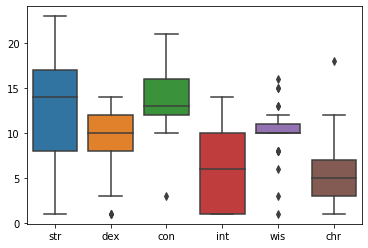

In [4]:
stats_df = df.loc[df.type == 'Plant'].reindex(columns=['str', 'dex','con', 'int', 'wis', 'chr'])
sns.boxplot(data=stats_df)


In [5]:
df[['size','type','align','skills','wri','senses','languages']]


,size,type,align,skills,wri,senses,languages
0,Tiny,Undead,NE,NaN,"Poisonimmu, charmedimmu, exhaustionimmu, poiso...",Blindsight 30,Common
1,Medium,Fiend,LE,NaN,"Coldres, fireimmu, poisonimmu, charmedimmu, fr...",Darkvision 120,Infernal
2,Medium,Plant,U,NaN,"Blindedimmu, deafenedimmu, frightenedimmu",Blindsight 30,NaN
3,Tiny,Construct,N,NaN,"Poisonimmu, charmedimmu, poisonedimmu",Darkvision 60,Creator
4,Small,Plant,U,NaN,"Fireweak, piercingres",Normal,Creator
...,...,...,...,...,...,...,...
797,Gargantuan,Fiend,CE,"Arcana, Perception, Religion","Acidimmu, coldimmu, fireimmu, lightningimmu, n...","Darkvision 240, truesight 120","Common, Draconic, Infernal"
798,NaN,Undead,LE,NaN,"TEMP, necroticres, poisonimmu, charmedimmu, fr...",NaN,NaN
799,NaN,NaN,NaN,NaN,NaN,"TEMP, Blindsight 10, Darkvision 60","TEMP, Draconic"
800,NaN,Plant,U,NaN,NaN,NaN,NaN


In [6]:
df[['size','type','align','skills','wri','senses','languages']]


,size,type,align,skills,wri,senses,languages
0,Tiny,Undead,NE,NaN,"Poisonimmu, charmedimmu, exhaustionimmu, poiso...",Blindsight 30,Common
1,Medium,Fiend,LE,NaN,"Coldres, fireimmu, poisonimmu, charmedimmu, fr...",Darkvision 120,Infernal
2,Medium,Plant,U,NaN,"Blindedimmu, deafenedimmu, frightenedimmu",Blindsight 30,NaN
3,Tiny,Construct,N,NaN,"Poisonimmu, charmedimmu, poisonedimmu",Darkvision 60,Creator
4,Small,Plant,U,NaN,"Fireweak, piercingres",Normal,Creator
...,...,...,...,...,...,...,...
797,Gargantuan,Fiend,CE,"Arcana, Perception, Religion","Acidimmu, coldimmu, fireimmu, lightningimmu, n...","Darkvision 240, truesight 120","Common, Draconic, Infernal"
798,NaN,Undead,LE,NaN,"TEMP, necroticres, poisonimmu, charmedimmu, fr...",NaN,NaN
799,NaN,NaN,NaN,NaN,NaN,"TEMP, Blindsight 10, Darkvision 60","TEMP, Draconic"
800,NaN,Plant,U,NaN,NaN,NaN,NaN


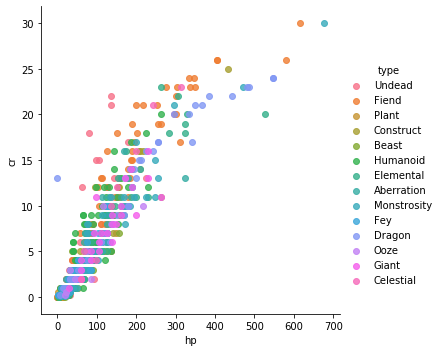

In [7]:
sns.lmplot(x='hp', y='cr', data=df, hue='type', fit_reg=False)


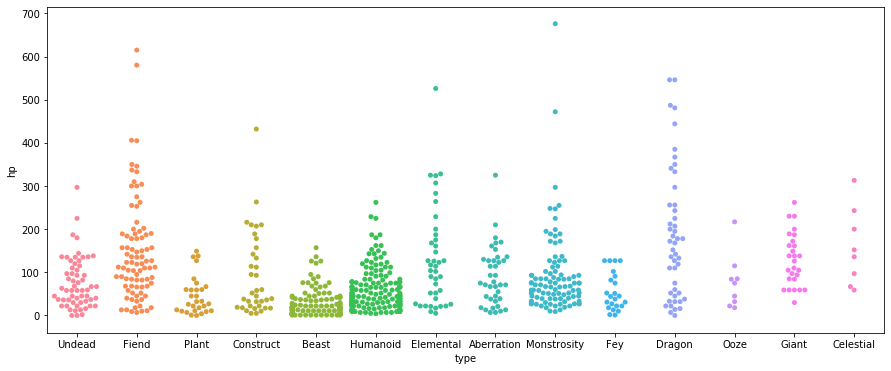

In [8]:
plt.figure(figsize=(15,6))
sns.swarmplot(x='type', y='hp', data=df)

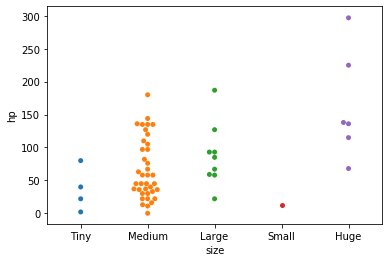

In [9]:
sns.swarmplot(x='size', y='hp', data=df.loc[df.type == 'Undead'])
